In [2]:
%matplotlib inline
from context import spew
from scipy.optimize import curve_fit, minimize
import numpy as np
from shapely.geometry import Point
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
import scipy.ndimage
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import rc
from mpl_toolkits.mplot3d import axes3d
from matplotlib import colors as mcolors
from matplotlib.collections import PolyCollection
import pandas as pd
import scipy.stats as stats

plt.style.use('ggplot')



rc('font', **{'family': 'serif', 'serif': ['Palatino']})
rc('text', usetex=True)

In [3]:
param = "fall_time_threshold"
label = "FTT"
units = "s"
trial = 3
vals = [0, 288, 3600, 7200, 10800, 14400, 18000, 10000000]

def disp_func(ftt):
    return ftt

eruptions = dict()


In [4]:

for v in vals:
    filename = '../../data/%s_trial_%d/%s_trial_%d.txt' % (
        param, trial, param, v)
    eruptions[v] = spew.core.eruption.Eruption(data=filename, vent=Point(532290, 1382690), test=False)
    eruptions[v].df = eruptions[v].df[(eruptions[v].df["MassArea"] != 0)]

phis = eruptions[vals[0]].phi_labels
rows = int(len(phis) / 2)

0


c:\users\nmostert\envs\spew\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


0 1703752124780.0 90.51365604481715
288
288 1696078844780.0 90.10600482809733
3600
3600 1187836845620.0 63.10510438582278
7200
7200 1143074109980.0 60.72703612200934
10800
10800 1133525346944.0 60.21974786069282
14400
14400 1127521976652.0 59.90081238538715
18000
18000 1124692453148.0 59.750490919320086
10000000


c:\users\nmostert\envs\spew\lib\site-packages\numpy\core\_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
c:\users\nmostert\envs\spew\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


10000000 1137061699120.8037 60.40762035689051


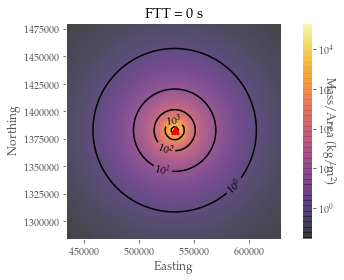

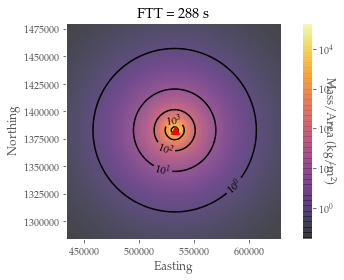

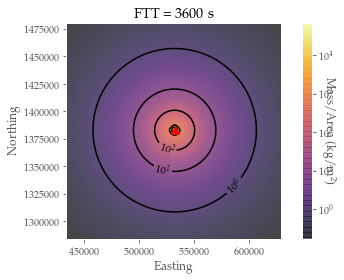

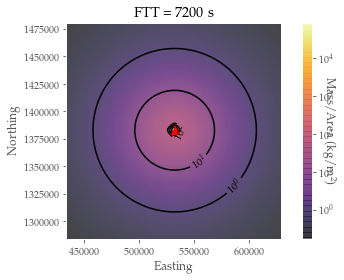

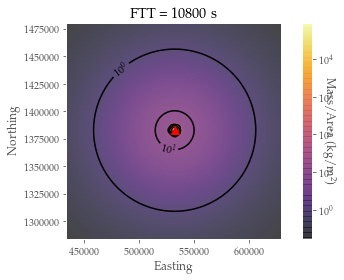

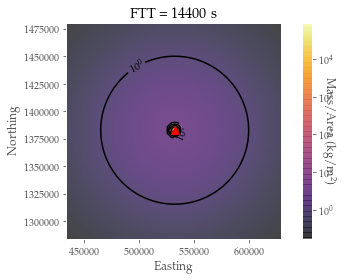

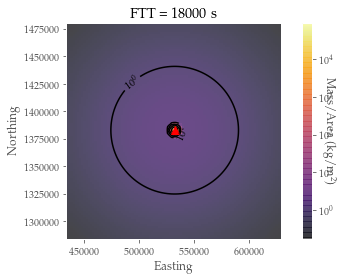

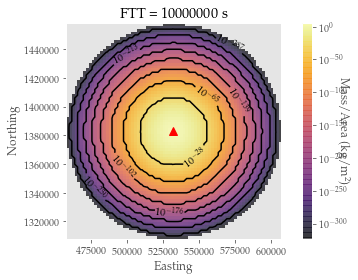

In [5]:
for v in vals:
    print(v)
    fig, ax =  eruptions[v].plot_contour(background='gradient', cmap="inferno", 
                                         line_colors="k", title="FTT = %d s"%v, 
                                         cbar_label="Mass/Area (kg/m$^2$)")
    ax.grid(False)
    
#     eruptions[v].df.plot(ax=ax, c='r', marker='.', edgecolor="k")
    
    mass = (2000**2) * eruptions[v].df["MassArea"]
    
    input_mass = 1882315000000
    
    tot_mass = mass.sum()
    
    mass_perc = (tot_mass/input_mass)*100
    
    print(v,tot_mass, mass_perc)
    
    plt.savefig("fft_%d.png"%v, dpi=200, format='png')
    

0


c:\users\nmostert\envs\spew\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


288
3600
7200
10800
14400
18000
10000000


c:\users\nmostert\envs\spew\lib\site-packages\numpy\core\_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
c:\users\nmostert\envs\spew\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


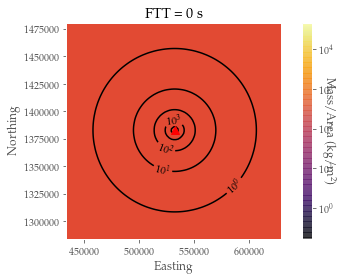

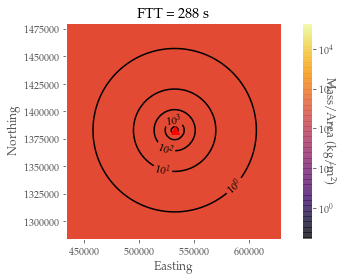

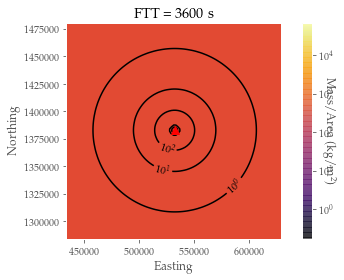

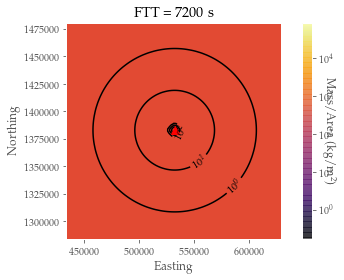

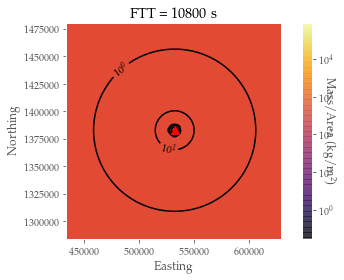

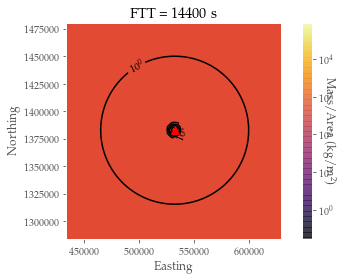

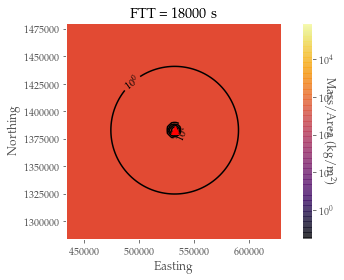

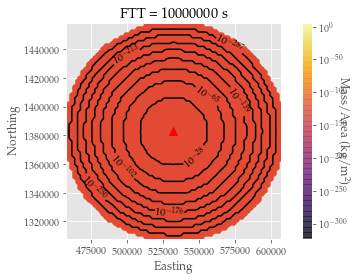

In [6]:
for v in vals:
    print(v)
    fig, ax =  eruptions[v].plot_contour(background='gradient', cmap="inferno", 
                                         line_colors="k", title="FTT = %d s"%v, 
                                         cbar_label="Mass/Area (kg/m$^2$)")
    eruptions[v].df.plot(ax=ax)